In [1]:
from youtube_transcript_api import YouTubeTranscriptApi

from summarizer import Summarizer
from nltk.tokenize import TextTilingTokenizer

from matplotlib import pylab

from gensim.summarization import keywords

import my_func
import my_segment

import warnings

warnings.filterwarnings('ignore')

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c

In [2]:
link = 'https://www.youtube.com/watch?v=g1Pgo5yTIKg'
# link = 'https://www.youtube.com/watch?v=3vRC5TMbkaU'

link_id = link.replace('https://www.youtube.com/watch?v=', '')

data = YouTubeTranscriptApi.get_transcript(link_id)
data[:3]

[{'text': ">> It's my pleasure to\nwelcome Bhaskar Mitra today.",
  'start': 3.9,
  'duration': 3.32},
 {'text': 'Bhaskar is actually stationed', 'start': 7.231, 'duration': 2.579},
 {'text': 'in our London office currently.',
  'start': 9.811,
  'duration': 1.779}]

In [3]:
text = ''.join([data[i]['text']+' ' for i in range(len(data))])

In [4]:
text_main = my_func.my_processing(text)
my_func.my_save_file('text_main.txt', text_main)
text_without_punct = text_main.replace('.', '').lower()

In [5]:
text_NNsplit = my_segment.segment('NNsplit', text_without_punct)
# my_func.my_save_file('NNsplit.txt', text_NNsplit)

In [8]:
text_deepsegment = my_segment.segment('deepsegment', text_without_punct)
my_func.my_save_file('deepsegment.txt', text_deepsegment)


NOTE: There are multiple checkpoints present for this language.
['C:\\Users\\user\\.DeepSegment_en\\checkpoint_finetuned_model_name']
Default checkpoint is currently being used.
To use a different checkpoint, use DeepSegment("en", checkpoint_name=name_of_the_checkpoint)



In [9]:
text_punctuator = my_segment.segment('punctuator', text_without_punct)
my_func.my_save_file('punctuator.txt', text_punctuator)

# error_calculator

In [24]:
import error_calculator

In [25]:
error_calculator.compute_error(['text_main.txt'], ['deepsegment.txt'])

AssertionError: File: text_main.txt 
Error: 100 (4622) != 100000 (4325) 
Target context: say .PERIOD 100 .PERIOD000 
Predicted context: lets say 100000 most

In [26]:
error_calculator.compute_error(['text_main.txt'], ['NNsplit.txt'])

AssertionError: File: text_main.txt 
Error: im (203) != i (190) 
Target context: talk .PERIOD im going 
Predicted context: todays talk i m

In [27]:
error_calculator.compute_error(['text_main.txt'], ['punctuator.txt'])

AssertionError: File: text_main.txt 
Error: 100 (4622) != 100000 (4565) 
Target context: say .PERIOD 100 .PERIOD000 
Predicted context: .PERIOD say 100000 most

In [10]:
model = Summarizer()

In [28]:
text = text_deepsegment

In [29]:
len(text.split(' '))

12089

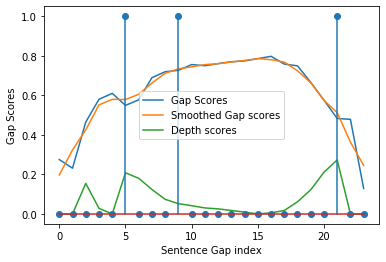

In [30]:
ww =  500
tt = TextTilingTokenizer(demo_mode=True, w = ww)
s, ss, d, b = tt.tokenize(text[:].replace("\n", " ").replace(".", ".\n\n"))
ttt = TextTilingTokenizer(w = ww)
tokens = ttt.tokenize(text.replace("\n", " ").replace(".", ".\n\n"))
pylab.xlabel("Sentence Gap index")
pylab.ylabel("Gap Scores")
pylab.plot(range(len(s)), s, label="Gap Scores")
pylab.plot(range(len(ss)), ss, label="Smoothed Gap scores")
pylab.plot(range(len(d)), d, label="Depth scores")
pylab.stem(range(len(b)), b)
pylab.legend()
pylab.show()

In [31]:
# tt = TextTilingTokenizer(demo_mode=True)

# s, ss, d, b = tt.tokenize(text[:].replace("\n", " ").replace(".", ".\n\n"))
# ttt = TextTilingTokenizer()
# tokens = ttt.tokenize(text.replace("\n", " ").replace(".", ".\n\n"))
# pylab.xlabel("Sentence Gap index")
# pylab.ylabel("Gap Scores")
# pylab.plot(range(len(s)), s, label="Gap Scores")
# pylab.plot(range(len(ss)), ss, label="Smoothed Gap scores")
# pylab.plot(range(len(d)), d, label="Depth scores")
# pylab.stem(range(len(b)), b)
# pylab.legend()
# pylab.show()

In [32]:
for token in tokens:
    paragraph = token.replace("\n", "")
    print(paragraph)
    print("\n") 

its my pleasure to welcome bhaskar mitra today. bhaskar is actually stationed in our london office. currently hes been at microsoft now about 11 years. is that right. yes about 11 years as a scientist in bing and somewhere during that time he switched to being a student about a year or two ago still while working at bing so hes working full time and completing his p at ucl under emine yilmaz. who many of us know and have collaborated with as well. hes become one of the leaders in applying neural models specifically to information retrieval problems. he and nick craswell have a nice paper. if you would like to read it thats available on the web right now currently under submission to foundations and trends and information retrieval that compare traditional ways of approaching information retrieval models and where their parallels are in the neural world. and hes going to talk to us about some of his recent work so with that ill have bhaskar take it away. thanks for the nice introduction

In [33]:
i = 0
for token in tokens:
#     print(token.replace("\n", " "))
    print(i, keywords(token.replace("\n", " "), ratio=0.3).replace("\n", "\ "))
    i += 1
    #     print("\n") 

0 different\ actually\ features\ featurize\ featurization\ representation\ representations\ differently based\ feature space\ learning\ learned\ learn\ start\ neural models specifically\ query\ right\ seattle\ spaces\ like\ text\ starts looking\ specific\ particular\ items\ item\ recent\ recently\ today\ todays\ example\ examples\ seahawks\ long\ search\ model\ modeling\ documents\ document\ zero\ popular\ interested\ weve\ wilson\ big\ main\ people\ explicitly\ traditional\ possible\ retrieval\ retrieve\ interesting thing\ look\ vector\ vectors\ banana\ youre generating\ online\ things\ networks\ network\ nice\ small toy\ paper\ papers\ basically\ basics\ words\ word\ similarity\ similar\ diagram\ pretty\ hes\ general\ generalizing\ early\ bhaskar\ input\ thats\ mentioned\ going\ framework\ frameworks\ office\ nick\ domes\ dome\ important\ area\ areas
1 query\ queries\ like\ different\ modeling\ models\ embedding\ embeddings\ actually\ actual\ model trained\ documents\ training\ train

In [34]:
timestamps = []
ii = 0
for j in range(1, len(data)):
    for i in range(ii, len(tokens)):
        if data[j]['text'].replace("\n", " ")\
                .split('.')[0] in tokens[i].replace("\n", "")\
                .replace(".", ""):
            timestamps += [data[j]['start']]
            ii += 1
            break


In [35]:
timestamps_min = [str(int(x // 3600))+ ':' + 
                  str(int(x // 60 % 60)) + ':' + \
                  str(int(x % 60)) for x in timestamps]

In [36]:
for j in range(len(timestamps_min)):
    print(timestamps[j], timestamps_min[j])

29.691 0:0:29
338.761 0:5:38
1045.436 0:17:25
1710.981 0:28:30


In [37]:
i = 0
for j in range(min(len(tokens), len(timestamps_min))):
#     print(token.replace("\n", " "))
    print(i, timestamps_min[i], keywords(tokens[j] .replace(
                    "\n", " "), ratio=0.05).replace("\n", "\ "))
    i += 1
    #     print("\n") 

0 0:0:29 different\ differently\ actually\ features\ featurize\ featurization\ representation\ representations\ neural\ feature space\ learning\ learned\ learn\ start\ starts\ query\ right\ seattle\ spaces
1 0:5:38 query\ queries\ like\ different\ modeling\ modelled\ models\ embedding\ embeddings\ actually\ actual\ model trained\ document\ documents\ training\ train\ right\ youre
2 0:17:25 model\ models\ modeling\ like\ likely\ queries\ query\ word\ words\ actually\ actual\ different\ difference\ differently\ differ\ document\ documents\ term\ terms\ termed\ learn\ learning\ learned\ learns\ right\ train\ trained\ training\ basically\ things\ thing\ embedding\ embeddings\ matching\ matches\ match\ matched\ youre\ text\ yes\ representation\ representations\ based\ data\ datas\ let\ lets
3 0:28:30 model\ models\ query\ queries\ different\ difference\ thats\ click\ clicked\ documents\ document\ actually\ yes


In [38]:
import gensim

In [40]:
for token in tokens:
    paragraph = token.replace("\n", "")
#     print(token.replace("\n", " "))
    for word_count in [50, 100, 200]:
        summarized_content = gensim.summarization.summarize(paragraph, word_count=word_count)
        print()
        print('---> Summarized Content (Word Count is %d):' % word_count)
        print(summarized_content)


---> Summarized Content (Word Count is 50):
does it have a tail and so on so forth so if you imagine some kind of a feature space like that then you could say that a dog could be represented by something that barks and has a tail but as a banana it could be represented by something thats a fruit and has a particular shape the interesting thing about distributed representation as opposed to local representation.

---> Summarized Content (Word Count is 100):
does it have a tail and so on so forth so if you imagine some kind of a feature space like that then you could say that a dog could be represented by something that barks and has a tail but as a banana it could be represented by something thats a fruit and has a particular shape the interesting thing about distributed representation as opposed to local representation.

---> Summarized Content (Word Count is 200):
weve been doing a few tutorials recently this year early specifically wisdm and sigir so if you are interested again on a